In [1]:
import numpy as np
from scipy.integrate import solve_ivp
# %matplotlib notebook
%matplotlib inline
import matplotlib.pyplot as plt

# Осциллятор Ван дер Поля
https://ru.wikipedia.org/wiki/Осциллятор_Ван_дер_Поля

mu - параметр нелинейности затухания.

Этот пример показывает, как от параметра mu зависит то, какие методы будут плохо работать:
* mu = 0 - неявные
* mu >> 1 - явные

Возьмём и прогоним все методы, реализованные в SciPy, на этой задаче.

In [2]:
def vdp(t, y, mu):
    return [
        y[1],
        mu*(1 - y[0]**2) * y[1] - y[0],
    ]

y0 = [2, 0]
t_span = [0, 2000]
methods = [
    'RK45', 
    'RK23', 
    'DOP853', 
    'Radau', 
    'BDF', 
    'LSODA'
]

In [3]:
def test(mu, methods):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    for method in methods:
        res = solve_ivp(vdp, y0=y0, t_span=t_span, method=method, args=[mu])
        print(f'{method:8}: {res.nfev:8} fevals, {len(res.t)-1:8} steps. {res.message}')
        ax1.plot(res.y[0], res.y[1], '.', label=method)
        ax1.set_title('y(x)')
        ax2.plot(res.t, res.y[0], '.:', label=method)
        ax2.set_title('x(t)')

    plt.legend()
    plt.suptitle(f'Van der Pol, mu={mu}')
    pass

### mu = 0
При mu=0 это простейшая колебательная система.

RK45    :    12422 fevals,     2070 steps. The solver successfully reached the end of the integration interval.
RK23    :    30575 fevals,     7645 steps. The solver successfully reached the end of the integration interval.
DOP853  :    10046 fevals,      837 steps. The solver successfully reached the end of the integration interval.
Radau   :    23248 fevals,     3320 steps. The solver successfully reached the end of the integration interval.
BDF     :    15323 fevals,     7500 steps. The solver successfully reached the end of the integration interval.
LSODA   :    26671 fevals,    11472 steps. The solver successfully reached the end of the integration interval.


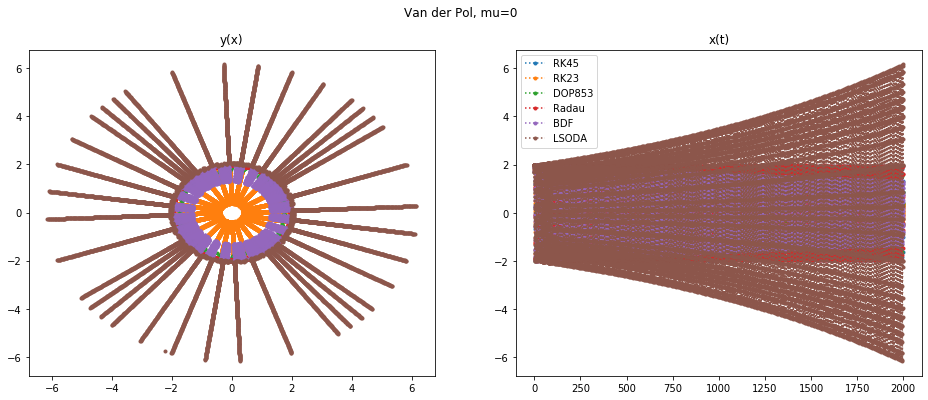

In [4]:
mu = 0
test(mu, methods)

### mu = 10

RK45    :    92978 fevals,    13087 steps. The solver successfully reached the end of the integration interval.
RK23    :    83696 fevals,    21386 steps. The solver successfully reached the end of the integration interval.
DOP853  :   110654 fevals,     7111 steps. The solver successfully reached the end of the integration interval.
Radau   :    92307 fevals,     9421 steps. The solver successfully reached the end of the integration interval.
BDF     :    58959 fevals,    18539 steps. The solver successfully reached the end of the integration interval.
LSODA   :    46734 fevals,    18953 steps. The solver successfully reached the end of the integration interval.


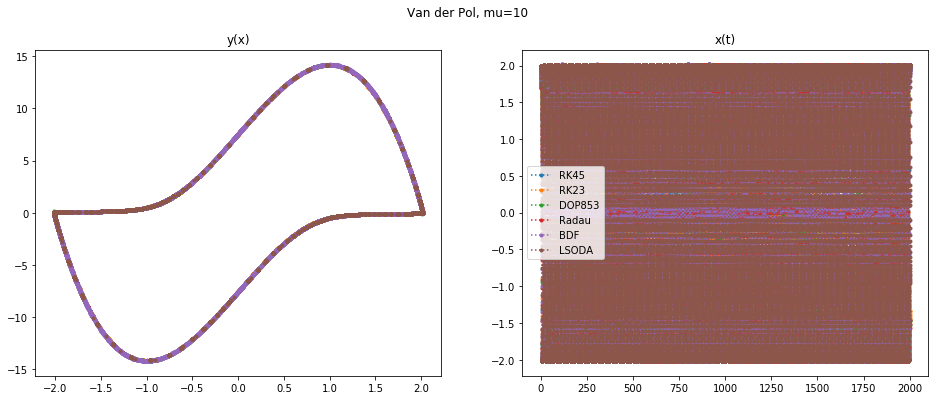

In [5]:
mu = 10
test(mu, methods)

### mu = 100

RK45    :   758798 fevals,   108788 steps. The solver successfully reached the end of the integration interval.
RK23    :   435476 fevals,   144180 steps. The solver successfully reached the end of the integration interval.
DOP853  :   681194 fevals,    56458 steps. The solver successfully reached the end of the integration interval.
Radau   :    16243 fevals,     1648 steps. The solver successfully reached the end of the integration interval.
BDF     :    10895 fevals,     3136 steps. The solver successfully reached the end of the integration interval.
LSODA   :     9472 fevals,     3731 steps. The solver successfully reached the end of the integration interval.


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


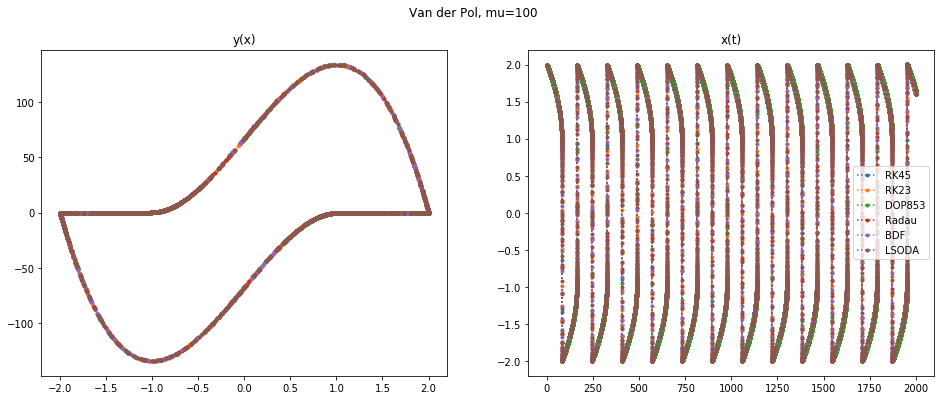

In [6]:
mu = 100
test(mu, methods)

### mu = 1000
явными даже пробовать не будем здесь

Radau   :     1929 fevals,      193 steps. The solver successfully reached the end of the integration interval.
BDF     :     1251 fevals,      363 steps. The solver successfully reached the end of the integration interval.
LSODA   :     1211 fevals,      493 steps. The solver successfully reached the end of the integration interval.


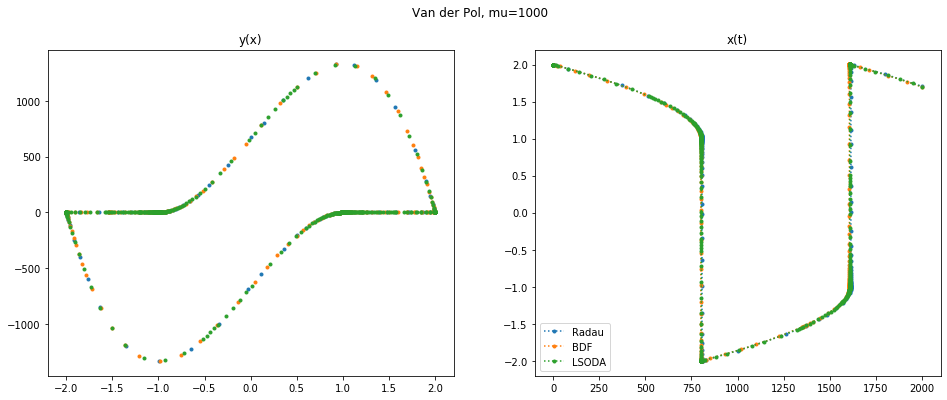

In [7]:
mu = 1000
test(mu, methods[3:])